/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


調整X_train的圖片尺寸...
使用 ResNet50 模型預測訓練資料的特徵資料...
調整X_test的圖片尺寸...
使用 ResNet50 模型預測測試資料的特徵資料...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 5000 samples, validate on 1000 samples
Epoch 1/14
 - 5s - loss: 1.5921 - acc: 0.4720 - val_loss: 0.9523 - val_acc: 0.6820
Epoch 2/14
 - 2s - loss: 0.9826 - acc: 0.6616 - val_loss: 0.8584 - val_acc: 0.7060
Epoch 3/14
 - 2s - loss: 0.8516 - acc: 0.7022 - val_loss: 0.8355 - val_acc: 0.7180
Epoch 4/14
 - 2s - loss: 0.7702 - acc: 0.7290 - val_loss: 0.7692 - val_acc: 0.7490
Epoch 5/14
 - 2s - loss: 0.7393 - acc: 0.7414 - val_loss: 0.7426 - val_acc: 0.7500
Epoch 6/14
 - 2s - loss: 0.6680 - acc: 0.7648 - val_loss: 0.7684 - val_acc: 0.7420
Epoch 7/14
 - 2s - loss: 0.6612 - acc: 0.7710 - val_loss: 0.7812 - val_acc: 0.7250
Epoch 8/14
 - 2s - loss: 0.6455 - acc: 0.7742 - val_loss: 0.7325 - val_acc: 0.7560
Epoch 9/14
 - 2s - loss: 0.6359 

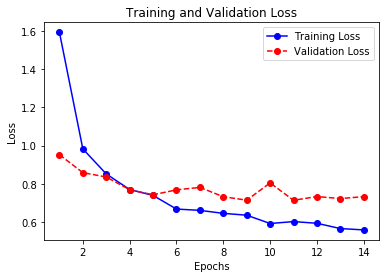

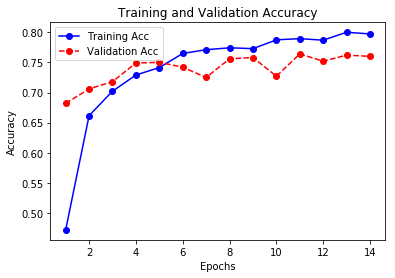

In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.utils import to_categorical
from PIL import Image

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
X_test, Y_test = randomize(X_test, Y_test)
# 取出10%訓練, 10%測試
X_train = X_train[:5000]
Y_train = Y_train[:5000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]
# One-hot編碼
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
# 載入 ResNet50 模型
resnet_model = ResNet50(weights="imagenet",
                        include_top=False,
                        input_shape=(200, 200, 3))
# 調整X_train的圖片尺寸
print("調整X_train的圖片尺寸...")
X_train_new = np.array(
  [np.asarray(Image.fromarray(X_train[i]).resize(
          (200, 200))) for i in range(0, len(X_train))])
X_train_new = X_train_new.astype("float32")
# 訓練資料的資料前處理 
train_input = preprocess_input(X_train_new)
# 使用 ResNet50 模型預測訓練資料的特徵資料
print("使用 ResNet50 模型預測訓練資料的特徵資料...")
train_features = resnet_model.predict(train_input)
# 調整X_test的圖片尺寸
print("調整X_test的圖片尺寸...")
X_test_new = np.array(
  [np.asarray(Image.fromarray(X_test[i]).resize(
          (200, 200))) for i in range(0, len(X_test))])
X_test_new = X_test_new.astype("float32")
# 測試資料的資料前處理
test_input = preprocess_input(X_test_new)
# 使用 ResNet50 模型預測測試資料的特徵資料
print("使用 ResNet50 模型預測測試資料的特徵資料...")
test_features = resnet_model.predict(test_input)
# 定義模型
model = Sequential()
model.add(GlobalAveragePooling2D(
        input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(train_features, Y_train,
                    validation_data=(test_features, Y_test), 
                    epochs=14, batch_size=32, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(test_features, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()